In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 


In [2]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


### Data Preprocessing

In [4]:
data.shape

(7920, 3)

In [5]:
data.duplicated().sum()

0

In [6]:
data.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

### Text Preprocessing

In [7]:
import re 
import string

Convert uppercase to lowercase

In [8]:
data["tweet"].head(5)

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

In [9]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [10]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Removing links

In [11]:
data["tweet"] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE) for x in x.split()))

In [12]:
data["tweet"].head(5)

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

Removing punctuation marks

In [13]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text 
data["tweet"] = data["tweet"].apply(remove_punctuations)        

In [14]:
data["tweet"].head(5)

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

Removing numbers

In [15]:
data["tweet"] = data['tweet'].str.replace('\d+','',regex=True)

In [16]:
data["tweet"].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app  mobi...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

Removing stop words

In [17]:
import nltk

In [18]:
nltk.download('stopwords',download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
with open('../static/model/corpora/stopwords/english','r') as file:
    sw = file.read().splitlines()

In [20]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [22]:
data["tweet"].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

Stemming

In [23]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [24]:
data["tweet"] = data["tweet"].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [25]:
data["tweet"].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [26]:
data["tweet"]

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

### Building Vocabulary

In [27]:
 from collections import Counter
 vocab =  Counter()

In [28]:
vocab

Counter()

In [29]:
data["tweet"]

0       fingerprint pregnanc test android app beauti c...
1       final transpar silicon case thank uncl yay son...
2       love would go talk makememori unplug relax iph...
3       im wire know im georg made way iphon cute dave...
4       amaz servic appl wont even talk question unles...
                              ...                        
7915    live loud lol liveoutloud selfi smile soni mus...
7916    would like wish amaz day make everi minut coun...
7917    help love year old neighbor ipad morn made rea...
7918    final got smart pocket wifi stay connect anyti...
7919    appl barcelona appl store bcn barcelona travel...
Name: tweet, Length: 7920, dtype: object

In [30]:
for sentence in data['tweet']:
    vocab.update(sentence.split())



In [31]:
vocab

Counter({'fingerprint': 5,
         'pregnanc': 1,
         'test': 12,
         'android': 414,
         'app': 416,
         'beauti': 322,
         'cute': 322,
         'health': 120,
         'iger': 143,
         'iphoneonli': 129,
         'iphonesia': 137,
         'iphon': 4073,
         'final': 192,
         'transpar': 5,
         'silicon': 5,
         'case': 348,
         'thank': 263,
         'uncl': 4,
         'yay': 69,
         'soni': 819,
         'xperia': 60,
         'sonyexperias…': 1,
         'love': 499,
         'would': 146,
         'go': 209,
         'talk': 27,
         'makememori': 1,
         'unplug': 3,
         'relax': 41,
         'smartphon': 134,
         'wifi': 50,
         'connect': 27,
         'im': 294,
         'wire': 8,
         'know': 106,
         'georg': 1,
         'made': 72,
         'way': 53,
         'daventri': 1,
         'home': 143,
         'amaz': 178,
         'servic': 51,
         'appl': 2876,
         'wont':

In [32]:
len(vocab)

15949

In [33]:
data.shape

(7920, 3)

In [34]:
tokens = [key for key in vocab if vocab[key] >10]

In [35]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [36]:
len(tokens)

1145

In [37]:
def save_vocabulary(lines,filename):
    data = '\n'.join(lines)
    file = open(filename,'w',encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens,'../static/model/vocabulary.txt')    

### Dividing dataset

In [38]:
X = data['tweet']
y = data['label']

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [40]:
X_train.shape

(6336,)

In [55]:
X_train

219     samsung galaxi plu dual sim gfd gb ram b black...
4045    amaz tree uk gener pictur good god nice day fa...
388     librari paula vogel news photographi fashion h...
3581    hey appl fuck steve job homepag shit get he de...
3340    give appl iphon drop iphon sink today one prob...
                              ...                        
6727             pleas tell phone break like appar reason
990     cant drag voic memo itun pc appl usual trick t...
4333    lepak mocha cold sunni day saturday soni xperi...
7867               news ipod develop yet anoth fault ipoo
2445    ridin brazil brasil manau iphon iphon photogra...
Name: tweet, Length: 6336, dtype: object

In [41]:
X_test.shape

(1584,)

In [54]:
X_test

1352    wifi hake password android app unitedst cute c...
2204    microsoft zune clearli superior product ipod m...
3189    soon preciou order bad girl samsung samsunggal...
4793    chromebook wifi inch samsung … via comput face...
6284    decid may download itun good organ music big m...
                              ...                        
2568              well io isnt yet im piss appl butilovey
4900    pc exquisit squishi random charm iphon strap t...
3427    go bed got haircut todaymad bigmov hope wake p...
2099                hope thi fix da problem appl iphon io
3320                         get charger back decid break
Name: tweet, Length: 1584, dtype: object

In [42]:
y_train

219     0
4045    0
388     0
3581    1
3340    0
       ..
6727    1
990     1
4333    0
7867    1
2445    0
Name: label, Length: 6336, dtype: int64

### Vectorization

In [86]:
def vectorizer(ds, vocabulary):
    vectorized_lst = []
    
    for sentence in ds:
        sentence_lst = np.zeros(len(vocabulary))
        
        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_lst[i] = 1
                
        vectorized_lst.append(sentence_lst)
        
    vectorized_lst_new = np.asarray(vectorized_lst, dtype=np.float32)
    
    return vectorized_lst_new 


In [87]:
vectorized_x_train = vectorizer(X_train, tokens)

In [88]:
vectorized_x_test = vectorizer(X_test, tokens)

In [89]:

vectorized_x_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [90]:

y_train

219     0
4045    0
388     0
3581    1
3340    0
       ..
6727    1
990     1
4333    0
7867    1
2445    0
Name: label, Length: 6336, dtype: int64

In [91]:
vectorized_x_test 

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [92]:
y_test

1352    0
2204    0
3189    0
4793    0
6284    1
       ..
2568    1
4900    0
3427    1
2099    1
3320    1
Name: label, Length: 1584, dtype: int64

In [93]:
y_train.value_counts()

label
0    4704
1    1632
Name: count, dtype: int64

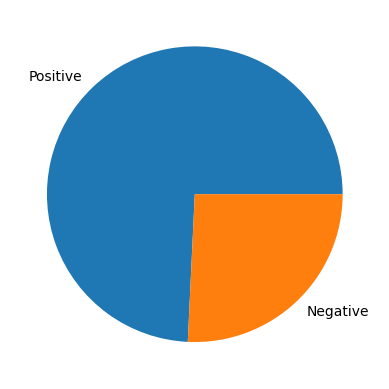

In [94]:
#This is an imbalance dataset
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

### Handle imbalanced dataset

In [95]:

from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_x_train_smote, y_train_smote = smote.fit_resample(vectorized_x_train, y_train)
print(vectorized_x_train_smote.shape, y_train_smote.shape)

(9408, 1145) (9408,)


In [96]:
y_train_smote.value_counts()

label
0    4704
1    4704
Name: count, dtype: int64

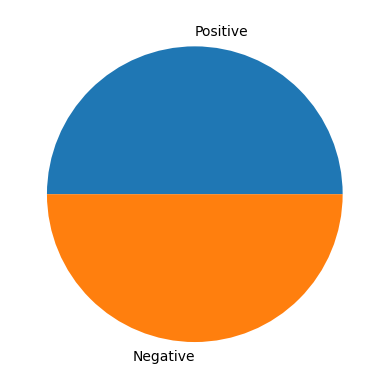

In [71]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels=['Positive', 'Negative'])
plt.show()

In [98]:
vectorized_x_train_smote

array([[0.       , 1.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.6960831, ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]], dtype=float32)

In [99]:

y_train_smote

0       0
1       0
2       0
3       1
4       0
       ..
9403    1
9404    1
9405    1
9406    1
9407    1
Name: label, Length: 9408, dtype: int64

In [100]:
vectorized_x_test

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [101]:
y_test

1352    0
2204    0
3189    0
4793    0
6284    1
       ..
2568    1
4900    0
3427    1
2099    1
3320    1
Name: label, Length: 1584, dtype: int64

### Model training and Evaluation

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 

In [109]:
    from sklearn.metrics import accuracy_score, f1_score,precision_score,recall_score

    def training_score(y_act, y_pred):
        acc = round(accuracy_score(y_act,y_pred),3)
        pr = round(precision_score(y_act,y_pred),3)
        rec = round(recall_score(y_act,y_pred),3)
        f1 = round(f1_score(y_act,y_pred),3)

        print(f'Training Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score = {f1}')

    def validation_scores(y_act,y_pred):
        acc= round(accuracy_score(y_act,y_pred),3)
        pr = round(precision_score(y_act,y_pred),3)
        rec = round(recall_score(y_act,y_pred),3)
        f1 = round(f1_score(y_act,y_pred),3)

        print(f'Testing Scores:\n\tAccuracy = {acc}\n\tPrecision = {pr}\n\tRecall ={rec}\n\tF1-Score = {f1}')




### Logistic Regression

In [121]:
lr = LogisticRegression()
lr.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = lr.predict(vectorized_x_train_smote)

y_test_pred = lr.predict(vectorized_x_test)

training_score(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.939
	Precision = 0.918
	Recall =0.965
	F1-Score = 0.941
Testing Scores:
	Accuracy = 0.87
	Precision = 0.693
	Recall =0.858
	F1-Score = 0.766


### Naive Bayes

In [123]:
mnb = MultinomialNB()

mnb.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = mnb.predict(vectorized_x_train_smote)

y_test_pred = mnb.predict(vectorized_x_test)

training_score(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.869
	Recall =0.95
	F1-Score = 0.908
Testing Scores:
	Accuracy = 0.865
	Precision = 0.66
	Recall =0.944
	F1-Score = 0.777


### Decision Tree Classifier

In [124]:
dt = DecisionTreeClassifier()

dt.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = dt.predict(vectorized_x_train_smote)

y_test_pred = dt.predict(vectorized_x_test)

training_score(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall =1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.841
	Precision = 0.686
	Recall =0.665
	F1-Score = 0.675


### Random Forest

In [125]:
rf = RandomForestClassifier()

rf.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = rf.predict(vectorized_x_train_smote)

y_test_pred = rf.predict(vectorized_x_test)

training_score(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)


Training Scores:
	Accuracy = 1.0
	Precision = 1.0
	Recall =1.0
	F1-Score = 1.0
Testing Scores:
	Accuracy = 0.878
	Precision = 0.756
	Recall =0.754
	F1-Score = 0.755


### Support Vector Classifier

In [126]:
svc = MultinomialNB()

svc.fit(vectorized_x_train_smote,y_train_smote)

y_train_pred = svc.predict(vectorized_x_train_smote)

y_test_pred = svc.predict(vectorized_x_test)

training_score(y_train_smote,y_train_pred)

validation_scores(y_test,y_test_pred)

Training Scores:
	Accuracy = 0.904
	Precision = 0.869
	Recall =0.95
	F1-Score = 0.908
Testing Scores:
	Accuracy = 0.865
	Precision = 0.66
	Recall =0.944
	F1-Score = 0.777


In [127]:
import pickle
with open('../static/model/model.pickle','wb') as file:
    pickle.dump(lr,file)
